# Homework: Decision Tree
## Phase 2: Classification with scikit-learn
***

## Import Libraries

In [1]:
# complete
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics




## Load Dataset (CSV file)

In [2]:
dataset = pd.read_csv('Decision_Tree_Dataset.csv', sep = ',', header = 0)
# X contains features, y contains the target variable
X = dataset.drop('Result', axis=1)
y = dataset['Result']

## Dataset Information

Descriptive Statistics:

- Purpose: Summarize and describe the main characteristics of the dataset.
- Techniques: Calculate mean, median, mode, standard deviation, range, and other summary statistics.

In [3]:
# complete
Descriptive_Statistics = {}
for i in range(1,4) :
    Descriptive_Statistics[dataset.columns[i]] = {'mean' : dataset[dataset.columns[i]].mean(),
                                                  'median' : dataset[dataset.columns[i]].median(),
                                                  'mode' : {j for j in dataset[dataset.columns[i]].mode()},
                                                  'standard deviation' : dataset[dataset.columns[i]].std(),
                                                  'range' : dataset[dataset.columns[i]].max() - dataset[dataset.columns[i]].min()}
print(Descriptive_Statistics)


{'Initial payment': {'mean': 294.343, 'median': 289.5, 'mode': {128, 157, 110}, 'standard deviation': 115.81538997713368, 'range': 400}, 'Last payment': {'mean': 12465.884, 'median': 12450.0, 'mode': {10379, 13924}, 'standard deviation': 1440.1561701212609, 'range': 4991}, 'Credit Score': {'mean': 528.042, 'median': 516.5, 'mode': {113, 991}, 'standard deviation': 259.7960589158893, 'range': 897}}


- provide a brief overview of the dataset (use info() )
- What is the nature of the data (e.g., text, numerical, images)?
- How many instances and features does the dataset contain?

In [4]:
# complete
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Result           1000 non-null   object
 1   Initial payment  1000 non-null   int64 
 2   Last payment     1000 non-null   int64 
 3   Credit Score     1000 non-null   int64 
 4   House Number     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [5]:
# complete
type(dataset[dataset.columns[1]][1])

numpy.int64

In [6]:
# complete
num_ins ,num_feat  = dataset.shape
print(f'number of features : {num_feat-1}\nnumber of instances : {num_ins} ')

number of features : 4
number of instances : 1000 


- Check for missing values

In [7]:
# complete

## Visualization

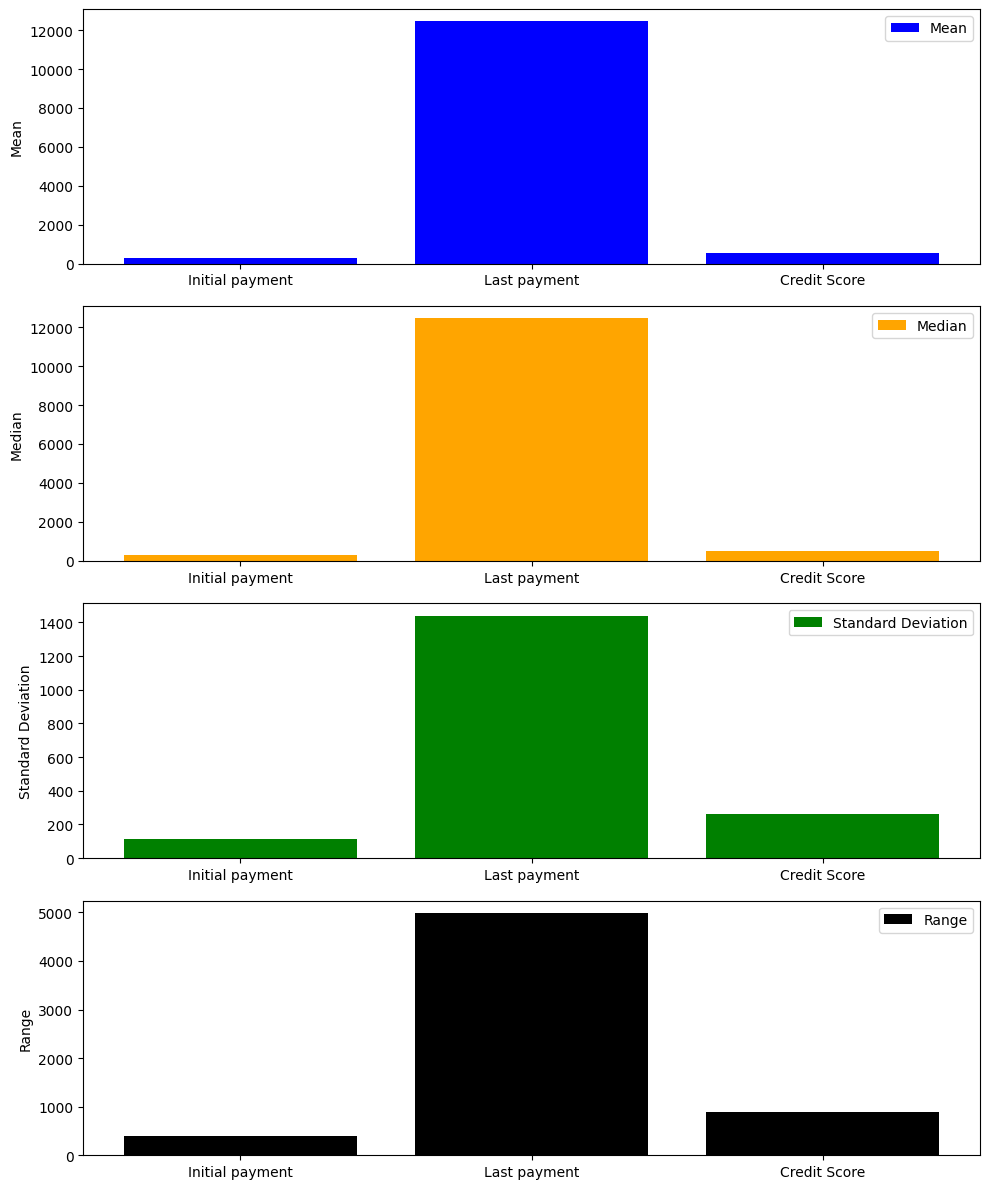

In [8]:
# complete(Extra Point)
import matplotlib.pyplot as plt

data = {
    'Initial payment': {'mean': 294.343, 'median': 289.5, 'mode': {128, 157, 110}, 'standard deviation': 115.81538997713368, 'range': 400},
    'Last payment': {'mean': 12465.884, 'median': 12450.0, 'mode': {10379, 13924}, 'standard deviation': 1440.1561701212609, 'range': 4991},
    'Credit Score': {'mean': 528.042, 'median': 516.5, 'mode': {113, 991}, 'standard deviation': 259.7960589158893, 'range': 897}
}

# Plotting mean, median, and standard deviation
categories = list(data.keys())
means = [data[key]['mean'] for key in categories]
medians = [data[key]['median'] for key in categories]
std_devs = [data[key]['standard deviation'] for key in categories]
ranges = [data[key]['range'] for key in categories]

fig, ax = plt.subplots(4, 1, figsize=(10, 12))

ax[0].bar(categories, means, color='blue', label='Mean')
ax[0].set_ylabel('Mean')

ax[1].bar(categories, medians, color='orange', label='Median')
ax[1].set_ylabel('Median')

ax[2].bar(categories, std_devs, color='green', label='Standard Deviation')
ax[2].set_ylabel('Standard Deviation')

ax[3].bar(categories, ranges, color='black' , label = 'Range')
ax[3].set_ylabel('Range')

for axis in ax:
    axis.legend()

plt.tight_layout()
plt.show()




## Model Building

In [9]:
#Separating the target variable
# complete


In [10]:
#Splitting dataset in to train and test data
# complete
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Model
# complete
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction

In [12]:
#Make predictions
# complete
y_pred = model.predict(X_test)


## Evaluate the Model

Assess the model's performance using various metrics such as accuracy, precision, recall, and F1 score

In [13]:
# complete
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='yes'))
print("Recall:", metrics.recall_score(y_test, y_pred, pos_label='yes'))
print("F1 Score:", metrics.f1_score(y_test, y_pred, pos_label='yes'))


Accuracy: 0.925
Precision: 0.8877551020408163
Recall: 0.9560439560439561
F1 Score: 0.9206349206349207


## Pruning

In [14]:
# def rep_pruning(tree, validation_data, label):
    # complete